https://colab.research.google.com/drive/1OmAdxU_Lw7r-tMXiTOeSI7NWgB3AF9QF

# Issue with image translation

In [0]:
from keras.datasets import mnist
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
X_train1 = X_train[y_train==1]

In [0]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0],num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_train.shape[1]

In [0]:
model = Sequential()
model.add(Dense(1000, input_dim=num_pixels, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=5, batch_size=1024, verbose=1)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.4730 - acc: 0.8733 - val_loss: 0.2302 - val_acc: 0.9334
Epoch 2/5
60000/60000 [==============================] - 1s 10us/step - loss: 0.1954 - acc: 0.9451 - val_loss: 0.1620 - val_acc: 0.9531
Epoch 3/5
60000/60000 [==============================] - 1s 10us/step - loss: 0.1387 - acc: 0.9614 - val_loss: 0.1261 - val_acc: 0.9635
Epoch 4/5
60000/60000 [==============================] - 1s 10us/step - loss: 0.1056 - acc: 0.9706 - val_loss: 0.1057 - val_acc: 0.9685
Epoch 5/5
60000/60000 [==============================] - 1s 10us/step - loss: 0.0838 - acc: 0.9770 - val_loss: 0.0971 - val_acc: 0.9711


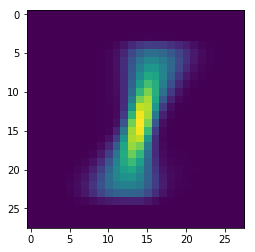

In [0]:
import numpy as np
pic=np.zeros((28,28))
pic2=np.copy(pic)
for i in range(X_train1.shape[0]):
    pic2=X_train1[i,:,:]
    pic=pic+pic2
pic=(pic/X_train1.shape[0])
plt.imshow(pic)

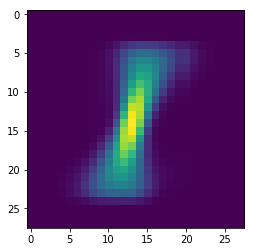

In [0]:
for i in range(pic.shape[0]):
    if i<20:
        pic[:,i]=pic[:,i+1]
    plt.imshow(pic)

In [0]:
model.predict(pic.reshape(1,784)/255)

array([[0.0029657 , 0.5275598 , 0.02109724, 0.00667586, 0.00159584,
        0.02306611, 0.07256491, 0.00125961, 0.34260005, 0.00061482]],
      dtype=float32)